In [1]:
from sklearn import datasets
import numpy as np
# Splitting training (0.7) and testing dataset (0.3) randomly
from sklearn.cross_validation import train_test_split
# It estimates the parameters (sample mean and standard deviation) for each feature dimension
# from the training dataset
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


def plot_decision_regions(ax, k1, k2, X,y,classifier,test_idx=None,resolution=0.02):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')           

In [2]:
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
twoFeatures = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
threeFeatures = [[0,1,2],[1,2,3],[0,2,3],[0,1,3]]
fourFeatures = [[0,1,2,3]]

In [3]:
# Loading the IRIS dataset
iris = datasets.load_iris()
y = iris.target

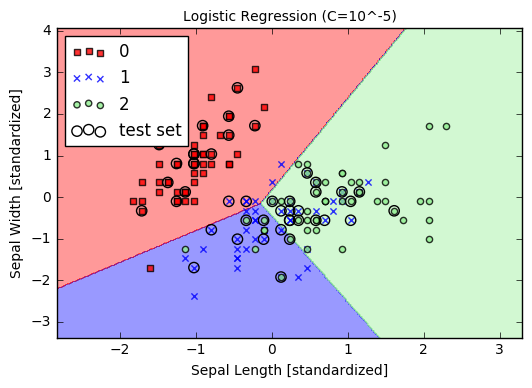

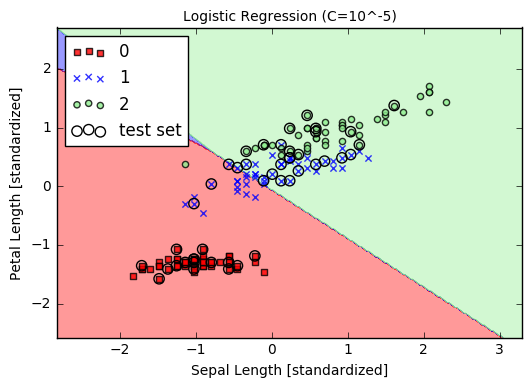

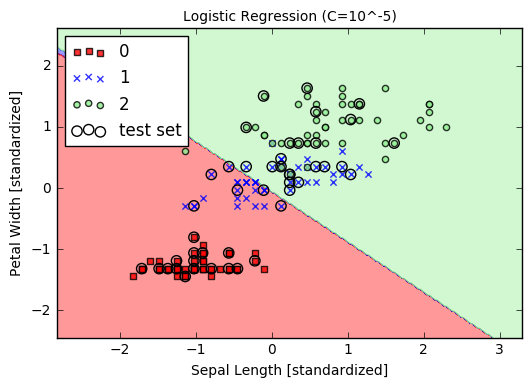

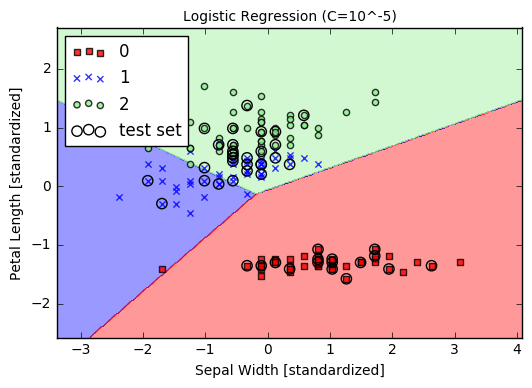

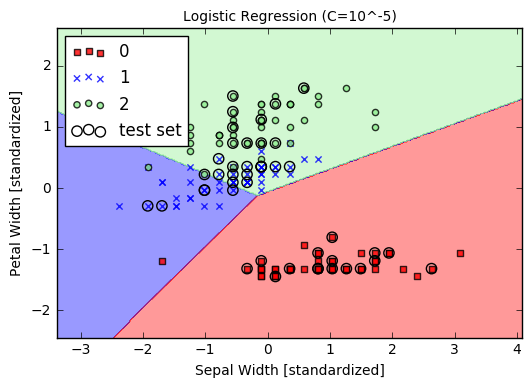

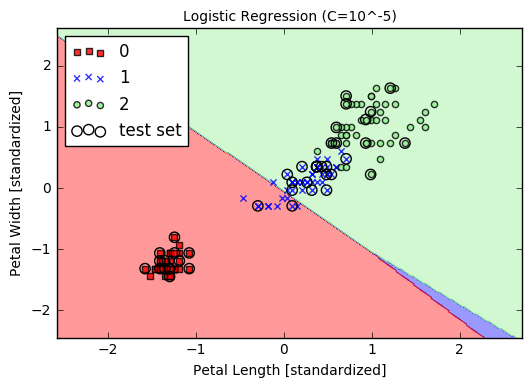

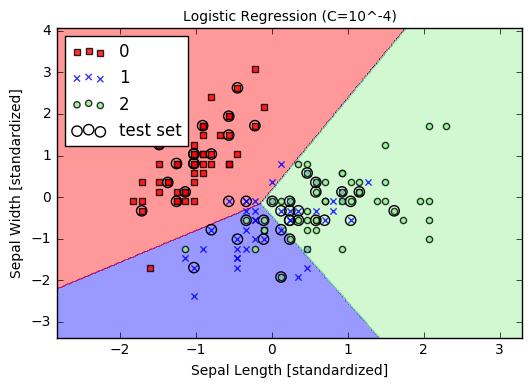

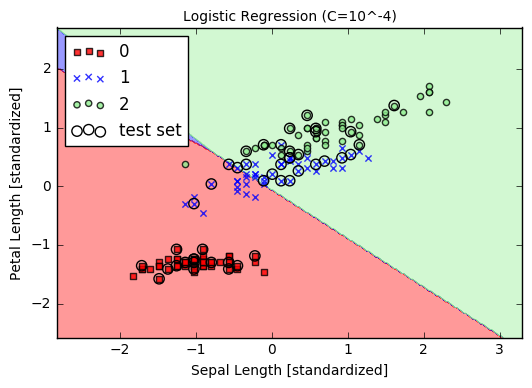

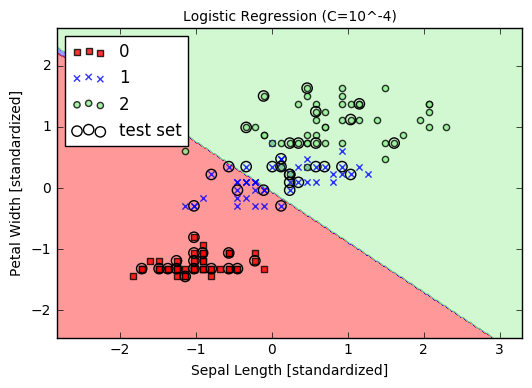

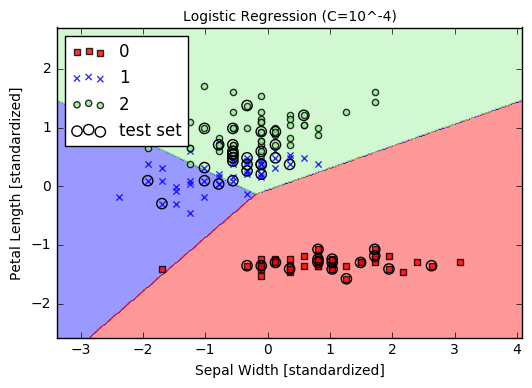

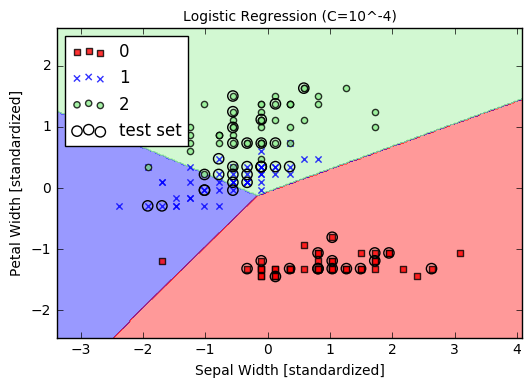

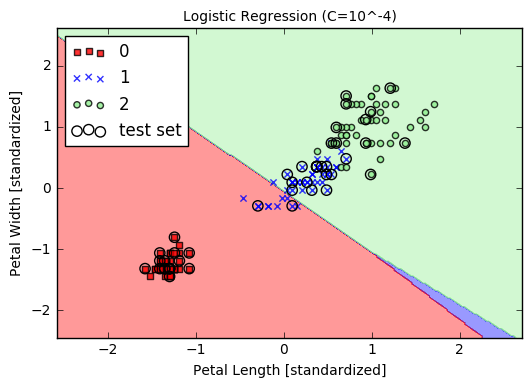

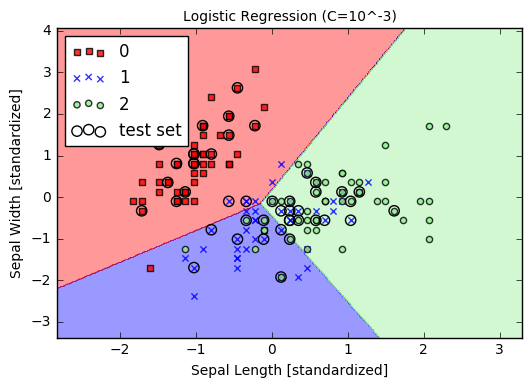

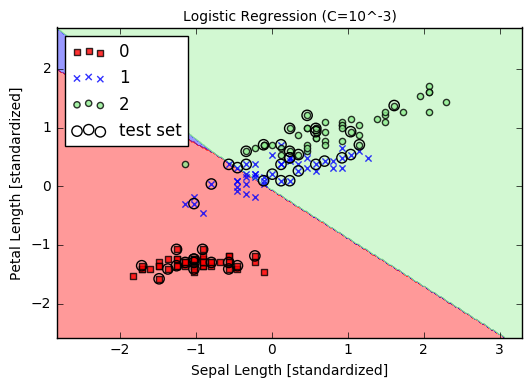

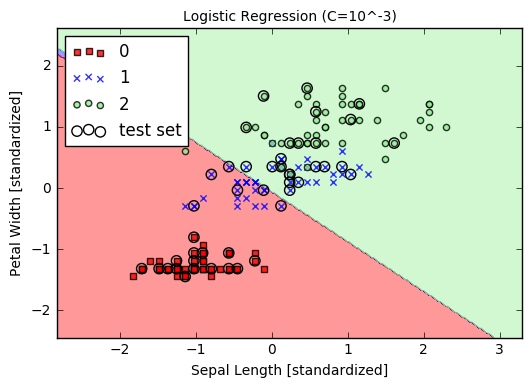

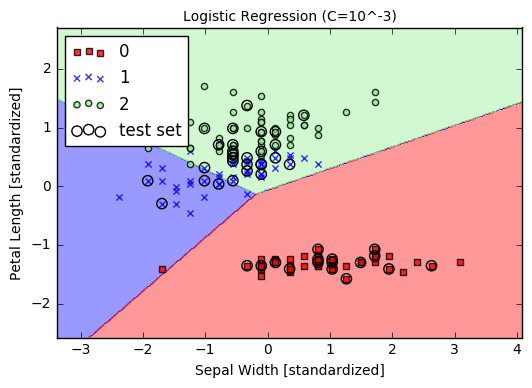

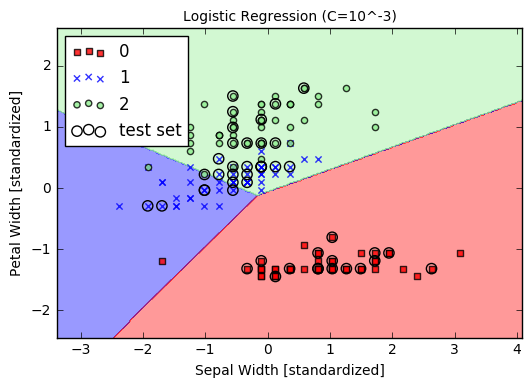

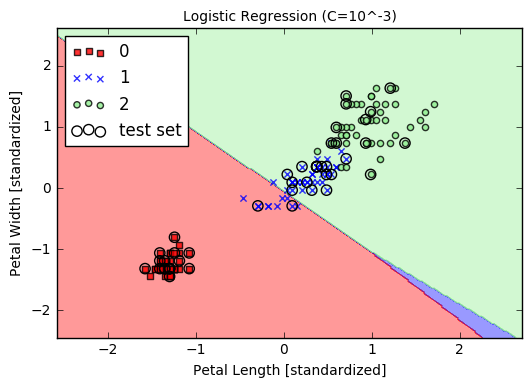

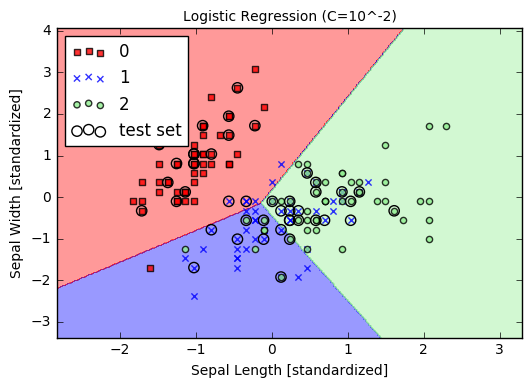

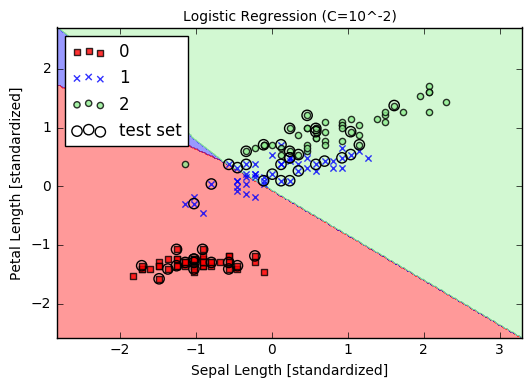

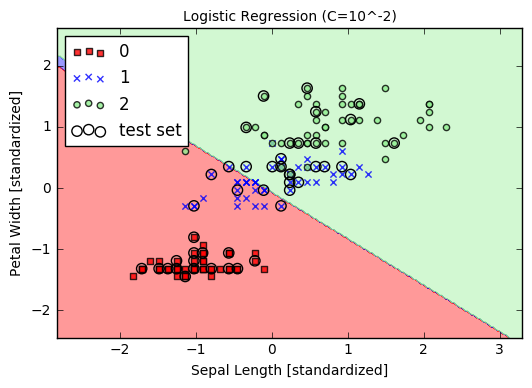

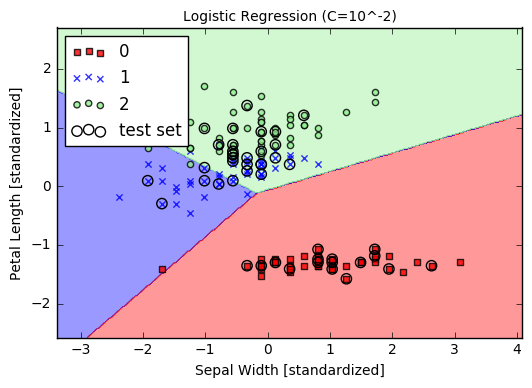

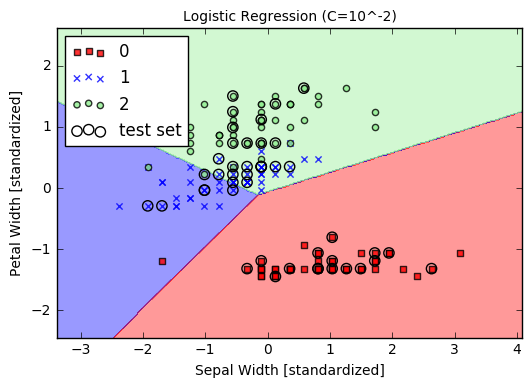

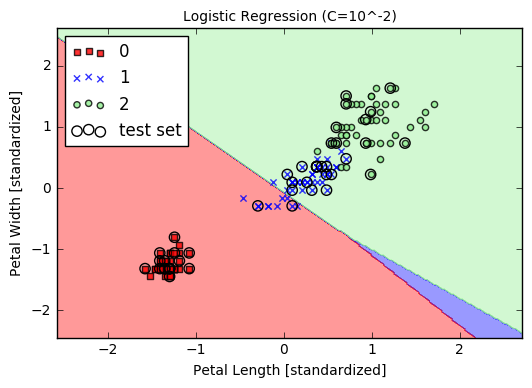

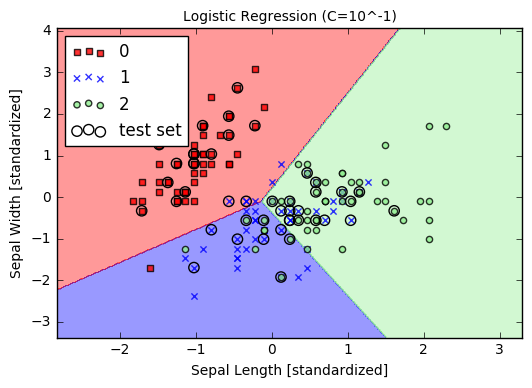

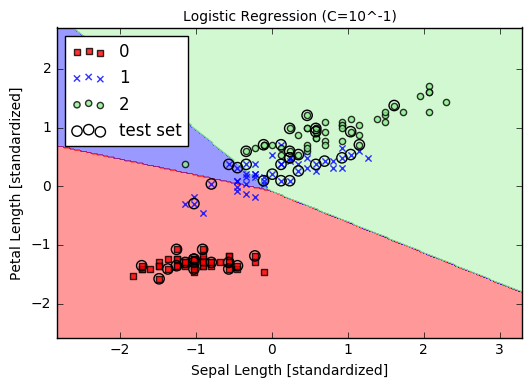

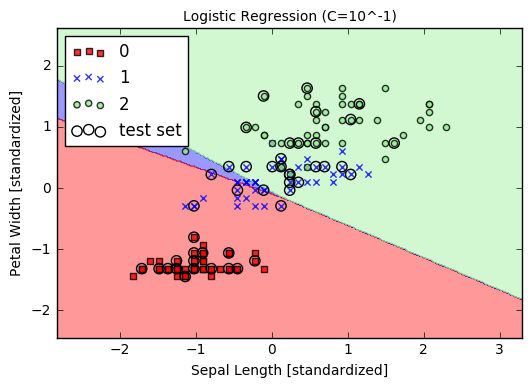

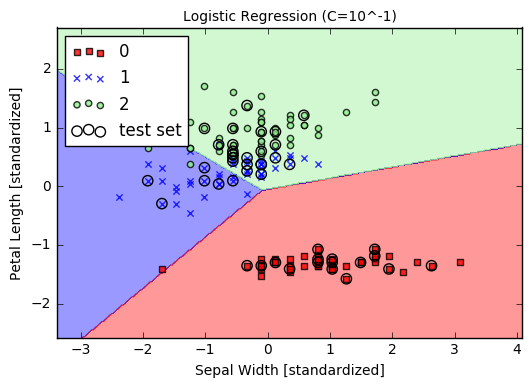

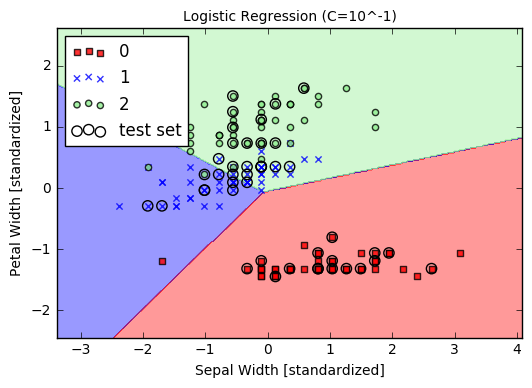

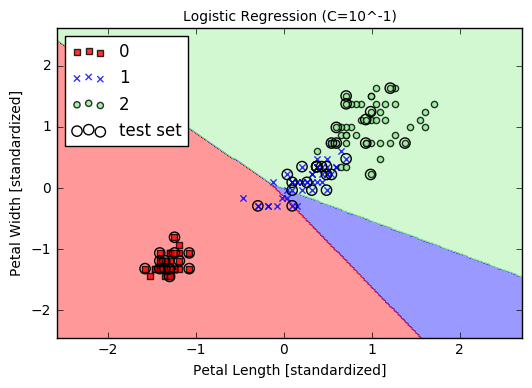

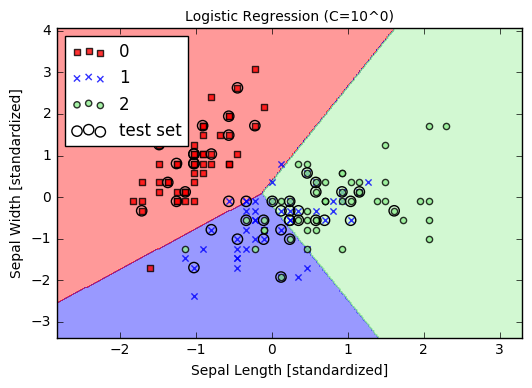

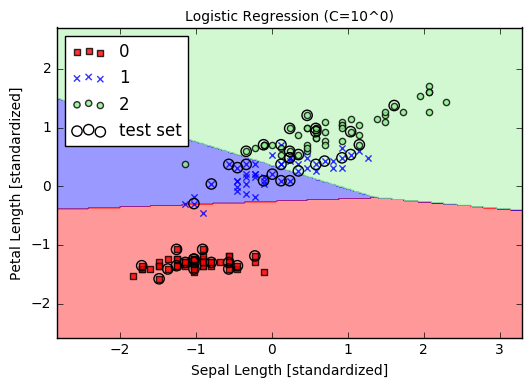

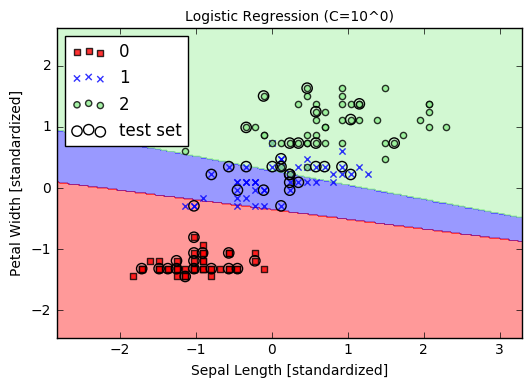

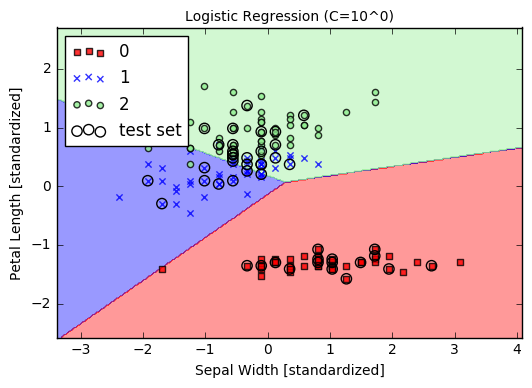

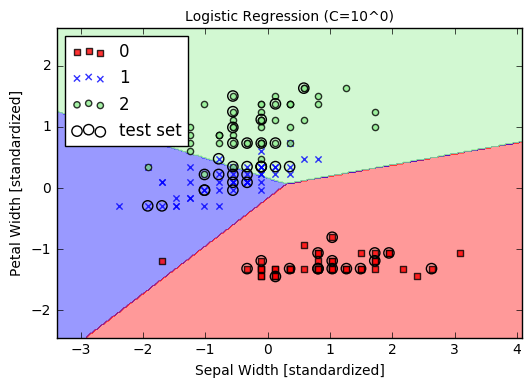

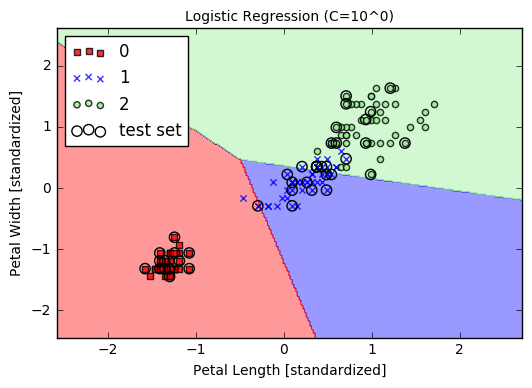

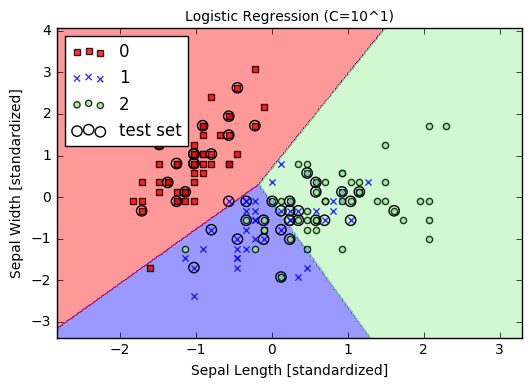

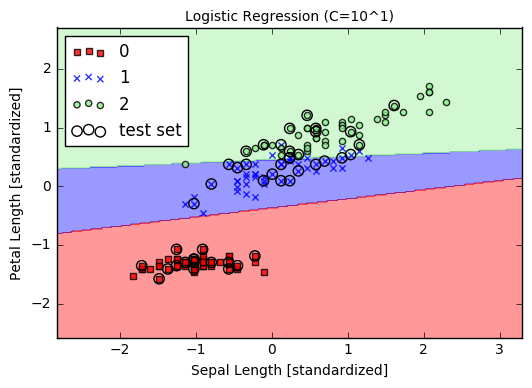

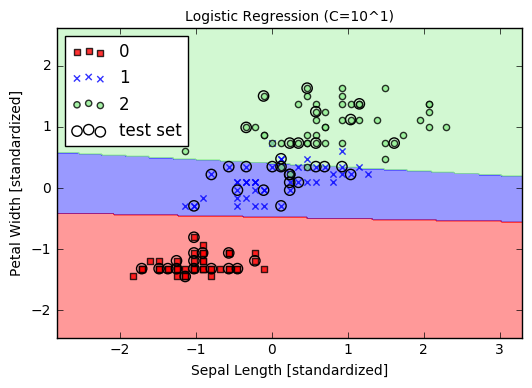

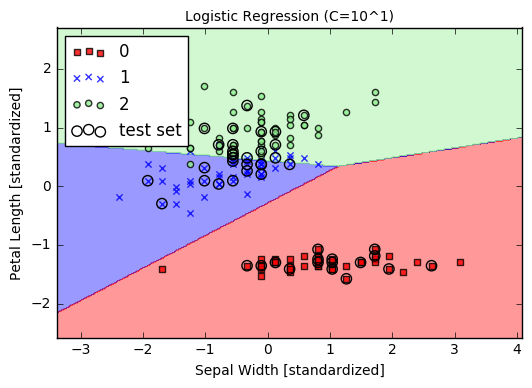

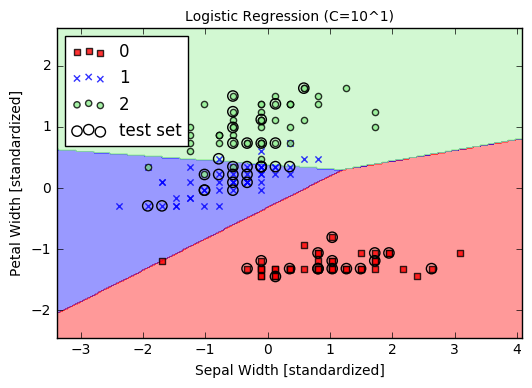

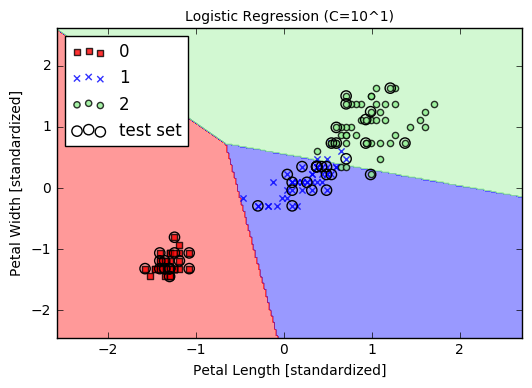

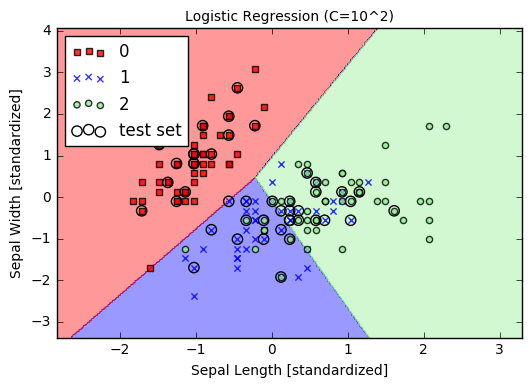

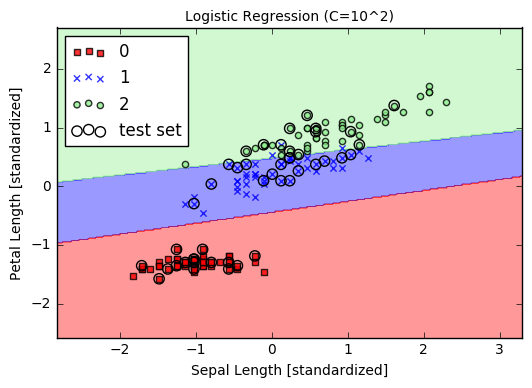

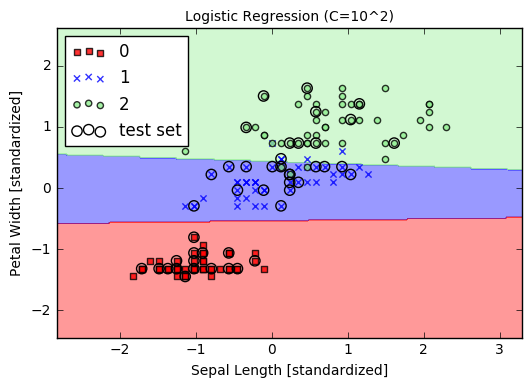

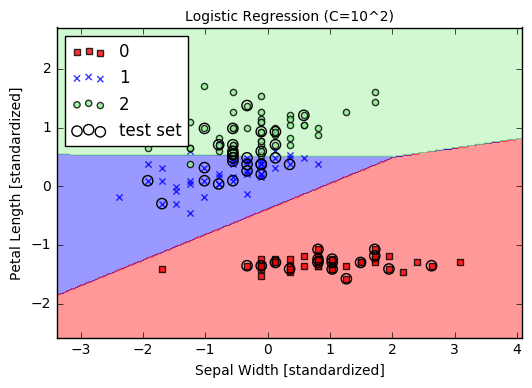

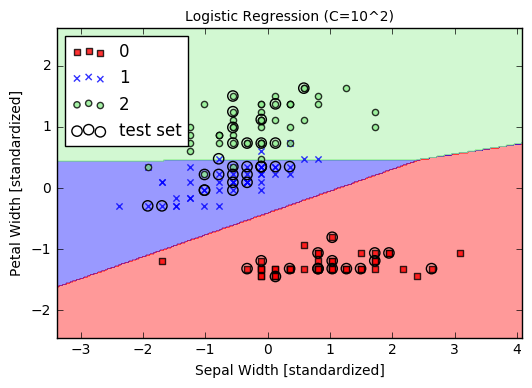

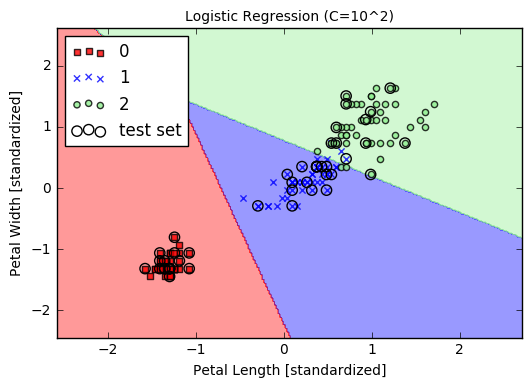

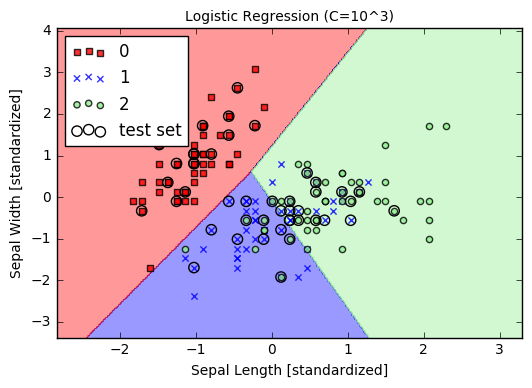

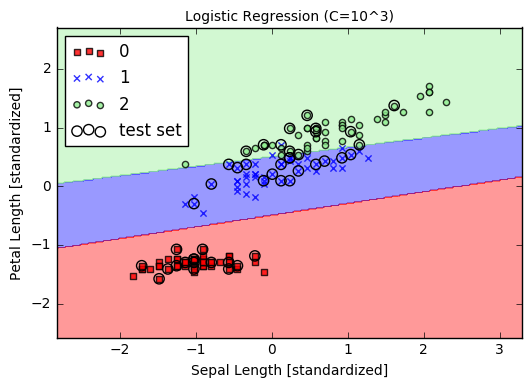

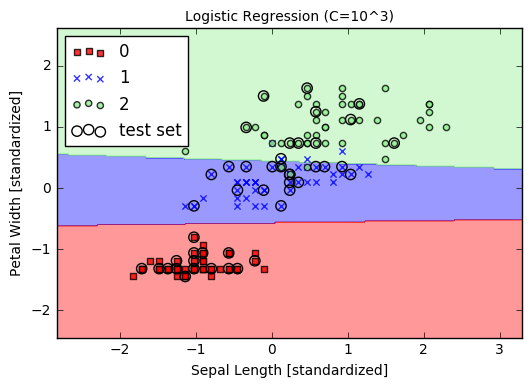

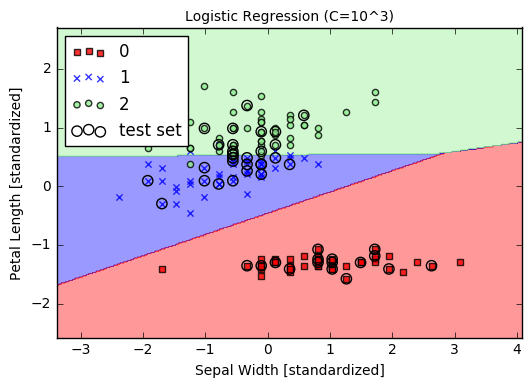

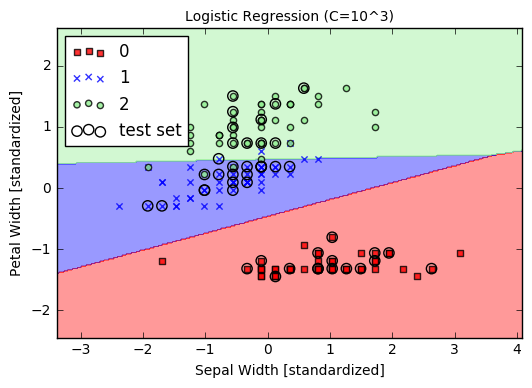

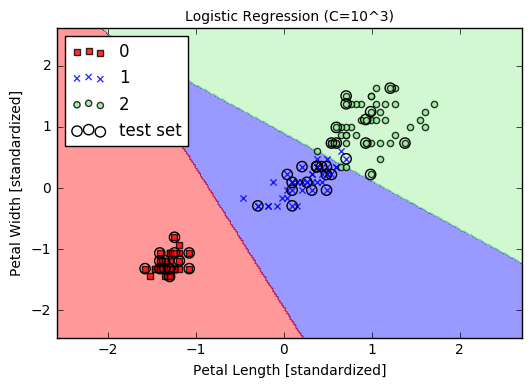

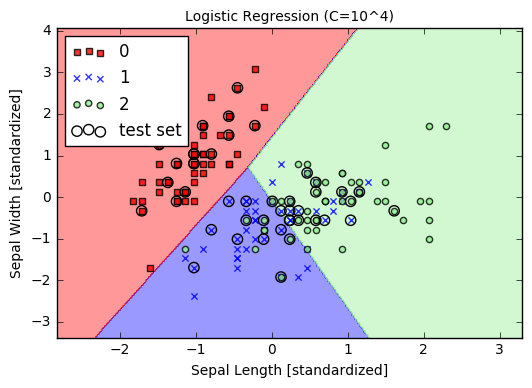

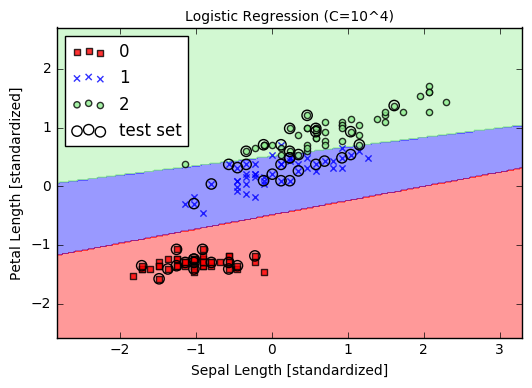

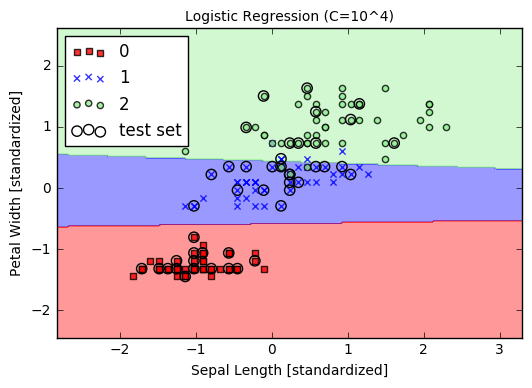

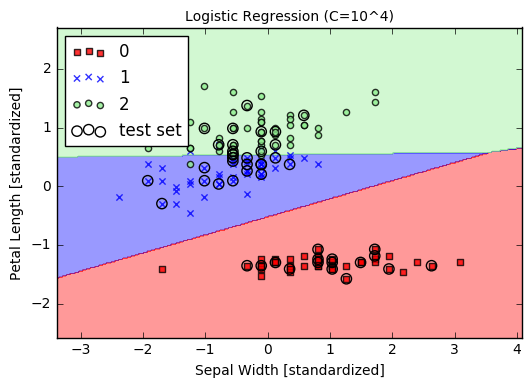

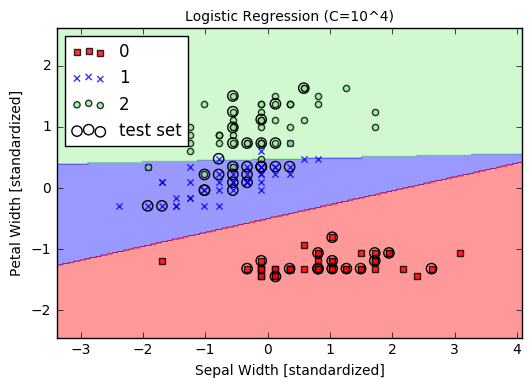

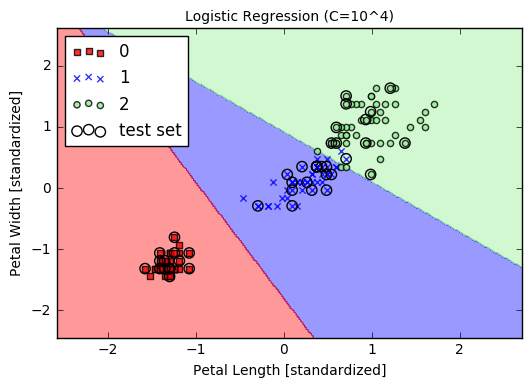

In [40]:
# For loop starts here
# ALL SIX CASES OF USING TWO FEATURES AT A TIME
twoFeatures_iteration = []
temp_iteration = []
twoFeatures_accuracy = []
temp_accuracy = []
for c in np.arange(-5,5):
    for idx, element in enumerate(twoFeatures):    
        X = iris.data[:, element]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        X_combined_std = np.vstack((X_train_std, X_test_std))
        y_combined = np.hstack((y_train, y_test))
        lr = LogisticRegression(C=10**c, random_state=0)
        lr.fit(X_train_std, y_train)
        plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
        plt.xlabel(str(features[element[0]]) + " [standardized]")
        plt.ylabel(str(features[element[1]]) + " [standardized]")
        plt.title('Logistic Regression (C=10^%d)' %(c), fontsize='medium')
        plt.legend(loc='upper left')
        plt.show()
        temp_accuracy.append(lr.score(X_test_std, y_test))
        temp_iteration.append(lr.n_iter_)
    twoFeatures_accuracy.append(temp_accuracy)
    twoFeatures_iteration.append(temp_iteration)
    temp_accuracy = []
    temp_iteration = []

In [43]:
# For loop starts here
# ALL FOUR CASES OF USING THREE FEATURES AT A TIME
threeFeatures_accuracy = []
threeFeatures_iteration = []
temp_accuracy = []
temp_iteration = []

for c in np.arange(-5,5):
    for idx, element in enumerate(threeFeatures):    
        X = iris.data[:, element]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        X_combined_std = np.vstack((X_train_std, X_test_std))
        y_combined = np.hstack((y_train, y_test))
        lr = LogisticRegression(C=10**c, random_state=0)
        lr.fit(X_train_std, y_train)
        temp_accuracy.append(lr.score(X_test_std, y_test))
        temp_iteration.append(lr.n_iter_)
    threeFeatures_accuracy.append(temp_accuracy)
    threeFeatures_iteration.append(temp_iteration)
    temp_accuracy = []
    temp_iteration = []

In [46]:
# For loop starts here
# THE ONE CASE OF USING ALL FEATURES AT ONCE
fourFeatures_accuracy = []
fourFeatures_iteration = []
temp_accuracy = []
temp_iteration = []

for c in np.arange(-5,5):
    for idx, element in enumerate(fourFeatures):    
        X = iris.data[:, element]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        X_combined_std = np.vstack((X_train_std, X_test_std))
        y_combined = np.hstack((y_train, y_test))
        lr = LogisticRegression(C=10**c, random_state=0)
        lr.fit(X_train_std, y_train)
        temp_accuracy.append(lr.score(X_test_std, y_test))
        temp_iteration.append(lr.n_iter_)
    fourFeatures_accuracy.append(temp_accuracy)
    fourFeatures_iteration.append(temp_iteration)
    temp_accuracy = []        
    temp_iteration = []

In [39]:
cList = np.arange(-5,5)
cList

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [100]:
# Two features table
from tabulate import tabulate

two_table = []
temp = []
for idx_cList, element_cList in enumerate(cList):
    accuracy = twoFeatures_accuracy[idx_cList]
    iteration = twoFeatures_iteration[idx_cList][0]
    for idx_feature, element_feature in enumerate(twoFeatures):
        description = features[element_feature[0]]
        description += " & " + features[element_feature[1]]
        two_table.append([description, 10**element_cList, iteration, round(accuracy[idx_feature], 2)])
    print(tabulate(two_table, headers=["Feature", "C Parameter",  "# of Iteration", "Accuracy (%)"]))
    print()
    print("Average Accuracy: " + str(round(sum(accuracy) / float(len(accuracy)),2)))
    print()

    two_table = []

Feature                        C Parameter    # of Iteration    Accuracy (%)
---------------------------  -------------  ----------------  --------------
Sepal Length & Sepal Width           1e-05                 1            0.67
Sepal Length & Petal Length          1e-05                 1            0.6
Sepal Length & Petal Width           1e-05                 1            0.6
Sepal Width & Petal Length           1e-05                 1            0.69
Sepal Width & Petal Width            1e-05                 1            0.69
Petal Length & Petal Width           1e-05                 1            0.6

Average Accuracy: 0.64

Feature                        C Parameter    # of Iteration    Accuracy (%)
---------------------------  -------------  ----------------  --------------
Sepal Length & Sepal Width          0.0001                 2            0.67
Sepal Length & Petal Length         0.0001                 2            0.6
Sepal Length & Petal Width          0.0001             

In [101]:
three_table = []
for idx_cList, element_cList in enumerate(cList):
    accuracy = threeFeatures_accuracy[idx_cList]
    iteration = threeFeatures_iteration[idx_cList][0]
    for idx_feature, element_feature in enumerate(threeFeatures):
        description = features[element_feature[0]] + " & " + features[element_feature[1]] + " & " + features[element_feature[2]]  
        three_table.append([description, 10**element_cList, iteration, round(accuracy[idx_feature], 2)])
    print(tabulate(three_table, headers=["Feature", "C Parameter",  "# of Iteration", "Accuracy (%)"]))
    print()
    print("Average Accuracy: " + str(round(sum(accuracy) / float(len(accuracy)),2)))
    print()
    three_table = []

Feature                                      C Parameter    # of Iteration    Accuracy (%)
-----------------------------------------  -------------  ----------------  --------------
Sepal Length & Sepal Width & Petal Length          1e-05                 2            0.73
Sepal Width & Petal Length & Petal Width           1e-05                 2            0.69
Sepal Length & Petal Length & Petal Width          1e-05                 2            0.6
Sepal Length & Sepal Width & Petal Width           1e-05                 2            0.71

Average Accuracy: 0.68

Feature                                      C Parameter    # of Iteration    Accuracy (%)
-----------------------------------------  -------------  ----------------  --------------
Sepal Length & Sepal Width & Petal Length         0.0001                 2            0.73
Sepal Width & Petal Length & Petal Width          0.0001                 2            0.69
Sepal Length & Petal Length & Petal Width         0.0001          

In [102]:
four_table = []
for idx_cList, element_cList in enumerate(cList):
    accuracy = fourFeatures_accuracy[idx_cList]
    iteration = fourFeatures_iteration[idx_cList][0]
    for idx_feature, element_feature in enumerate(fourFeatures):
        description = features[element_feature[0]] + "\n" + features[element_feature[1]] + "\n" + features[element_feature[2]] + "\n" + features[element_feature[3]]  
        four_table.append([description, 10**element_cList, iteration, round(accuracy[idx_feature], 2)])
    print(tabulate(four_table, headers=["Feature", "C Parameter",  "# of Iteration", "Accuracy (%)"]))
    print()
    print("Average Accuracy: " + str(round(sum(accuracy) / float(len(accuracy)),2)))
    print()
    four_table = []

Feature         C Parameter    # of Iteration    Accuracy (%)
------------  -------------  ----------------  --------------
Sepal Length          1e-05                 2            0.71
Sepal Width
Petal Length
Petal Width

Average Accuracy: 0.71

Feature         C Parameter    # of Iteration    Accuracy (%)
------------  -------------  ----------------  --------------
Sepal Length         0.0001                 2            0.71
Sepal Width
Petal Length
Petal Width

Average Accuracy: 0.71

Feature         C Parameter    # of Iteration    Accuracy (%)
------------  -------------  ----------------  --------------
Sepal Length          0.001                 3            0.71
Sepal Width
Petal Length
Petal Width

Average Accuracy: 0.71

Feature         C Parameter    # of Iteration    Accuracy (%)
------------  -------------  ----------------  --------------
Sepal Length           0.01                 4            0.71
Sepal Width
Petal Length
Petal Width

Average Accuracy: 0.71

Feature 

In [104]:
'''
Discussion
----------

What I learned:
If the learning rate is too large, the algorithm will overshoot the global cost minimum.
If the learning rate is too small, the algorithm requires more epochs until convergences,
which can make the learning slow - especially for the larger datasets.
Regularization is very useful method to handle collinearity (high correlation among features)
filter out noise from data, and eventually prevent overfitting.
Via the regularization parameter, we can then control how well we fit the training data, while
keeping the weights small. Consequently, decreasing the value of the inverse regularization
parameter C means, that we are increasing the regularization strength, which we can visualize by
plotting the L2 regularization path for the two weight coefficients.

After utilizing built-in skitlearn Logistic Regression algorithm, we can conclude that using
more dimensions does help when trying to classify the data in this dataset. For example,
if we take a look at the average accuracy of two dimension vs. all four dimension, the 
four dimension averaged accuracy yielded a higher percentage. It is also interesting to note
that when we are increasing the C parameter for regularization, there is a big improvement in the 
accuracy. The optimal C was 100, because when C is greater than 100, we don't really see a huge
improvement.

'''

"\nDiscussion\n----------\n\nWhat I learned:\nIf the learning rate is too large, the algorithm will overshoot the global cost minimum.\nIf the learning rate is too small, the algorithm requires more epochs until convergences,\nwhich can make the learning slow - especially for the larger datasets.\nRegularization is very useful method to handle collinearity (high correlation among features)\nfilter out noise from data, and eventually prevent overfitting.\nVia the regularization parameter, we can then control how well we fit the training data, while\nkeeping the weights small. Consequently, decreasing the value of the inverse regularization\nparameter C means, that we are increasing the regularization strength, which we can visualize by\nplotting the L2 regularization path for the two weight coefficients.\n\nAfter utilizing built-in skitlearn Logistic Regression algorithm, we can conclude that using\nmore dimensions does help when trying to classify the data in this dataset. For example,